In [1]:
import pandas as pd
import numpy as np

# import os
# display current working directory
# os.getcwd()

# import visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Import Data

##### Step 1a: Read tab delimited file and review data frame

In [2]:
# read in tab delimited data file
inp = pd.read_csv('../data/Bank_Marketing_Downloads.txt', sep='\t')

# review first five records of inp dataframe
inp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Step 2: Data Exploration

##### Step 2a: Check number of rows and columns imported into dataframe, data type and check for null values for each column

In [3]:
# check number of rows and columns imported
print('Dataframe contains', len(inp), 'rows and', len(inp.columns), 'columns')

Dataframe contains 45211 rows and 17 columns


In [4]:
# print out data types for each column in dataframe and check for null values
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dataframe (inp) has 7 numerical and 10 categorical columns. None of these columns have any null values

##### Step 2b: Explore numerical columns

In [5]:
# Summary stats for numeric columns
inp.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* Mean age is approximately 41, with minimum age 18 and maximum age 95
* Mean balance is $1362. However standard deviation is a high number suggesting balance amount is heavily more spread out and outlier in the dataset
* Although duration of call might not be important ie: the longer the, the more likely customer subscribes to term deposit. However, I am keen to see of the customer that subcribed, what was the mean duration. More on this further down this notebook.

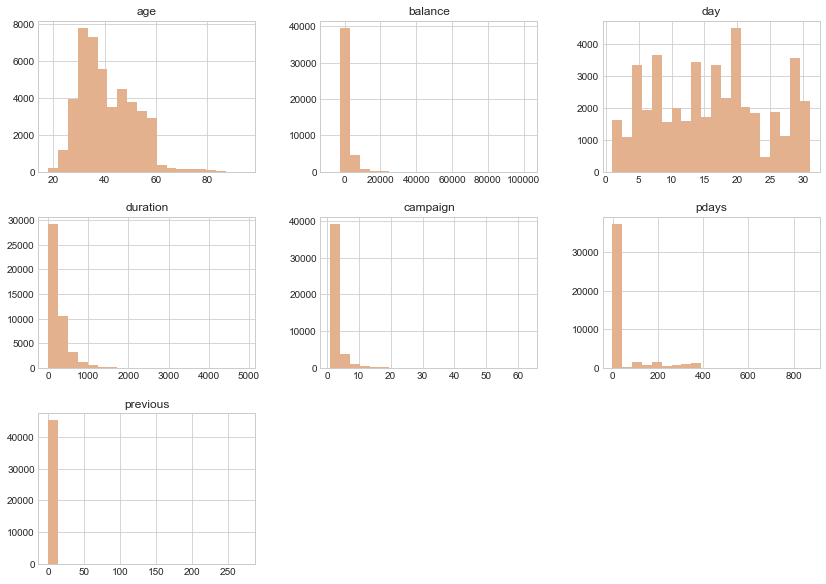

In [6]:
# distribution of each int columns
plt.style.use('seaborn-whitegrid')

inp.hist(bins=20, figsize=(14,10), color='#e3b18d')
plt.show()

* We can see that numerical columns have outliers, especially 'campaign', 'pdays' and 'previous' columns). Possibly there are incorrect values (noisy data).

In [7]:
# Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:
inp[['balance', 'duration', 'campaign', 'pdays', 'previous']].describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Percentage of 'pdays' values above 400:
len (inp[inp['pdays'] > 400] ) / len(inp) * 100

0.5175731569750724

* 'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:
* only 0.52% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.

In [9]:
# Percentage of 'campaign' values above 30:
len (inp[inp['campaign'] > 30] ) / len(inp) * 100

0.13049921479286014

* 'campaign' holds the number of contacts performed during this campaign and for this client (numeric, includes last contact) Numbers for 'campaign' above 30 are clearly noise
* Suggest to impute them with mean campaign values while data cleaning.

In [10]:
# Percentage of 'previous' values above 20:
len (inp[inp['previous'] > 34] ) / len(inp) * 100

0.024330362080024773

* 'previous' holds the number of contacts performed before this campaign and for this client (numeric) Numbers for 'previous' above 34 are also really strange
* suggest to impute them with mean campaign values while data cleaning.

##### Step 2c: Explore categorical columns

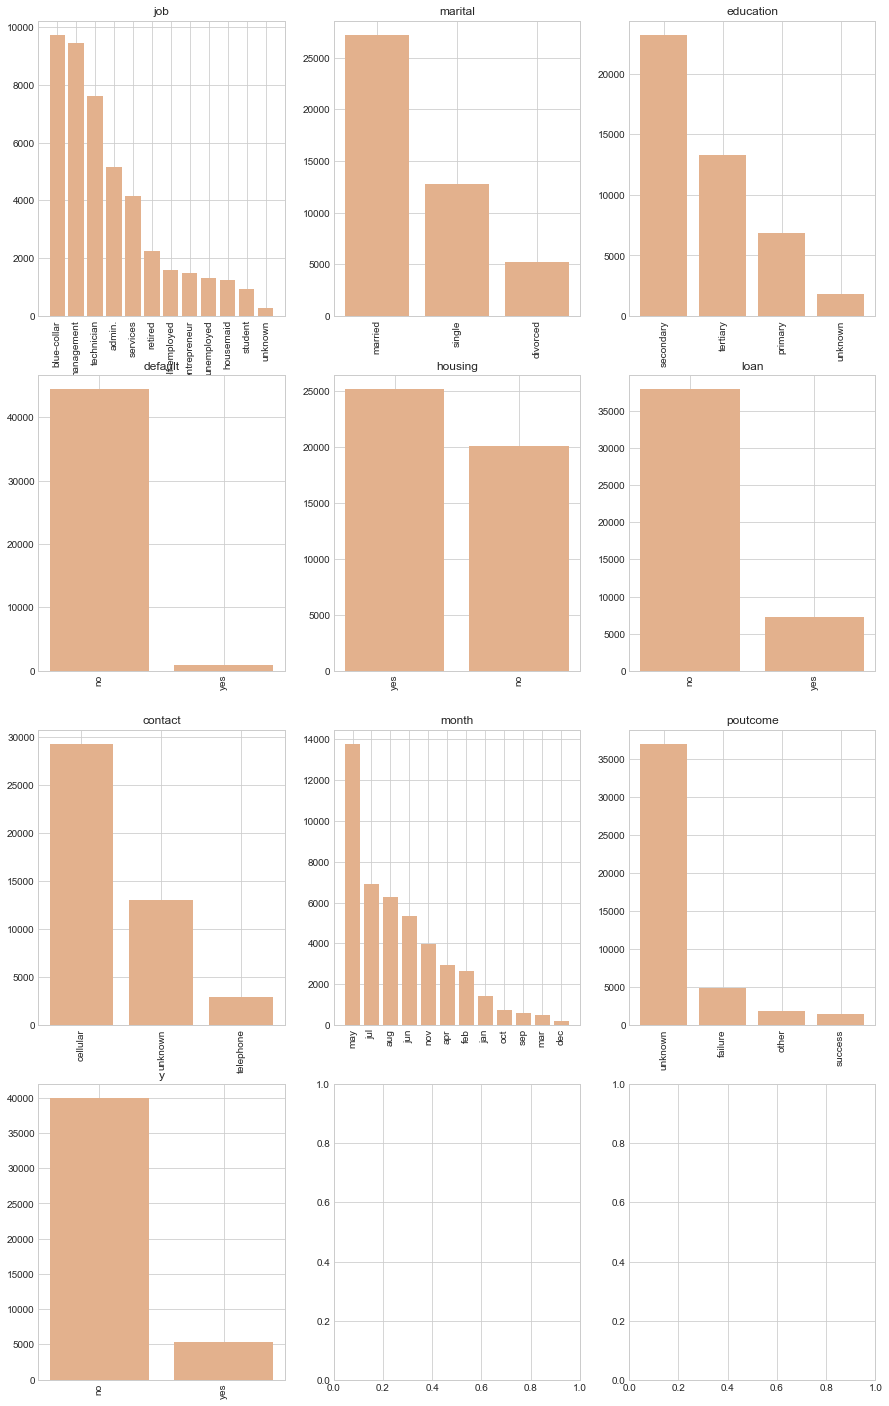

In [11]:
# distribution of categorical columns
colcatg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome', 'y']
plt.style.use('seaborn-whitegrid')

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(15, 25))

counter = 0
for catg in colcatg:
    value_counts = inp[catg].value_counts()
    
    x = counter // 3
    y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[x, y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color ='#e3b18d')
    
    axs[x, y].set_title(catg)
    
    for tick in axs[x, y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

* Main call out from looking at distribution of categorical columns is the imbalance in 'y' column (subscribed to term deposit)

In [12]:
# looking at variable y, taken up term deposit
total = len(inp['y'])
print(inp['y'].value_counts())
print(inp['y'].value_counts() / total)

no     39922
yes     5289
Name: y, dtype: int64
no     0.883015
yes    0.116985
Name: y, dtype: float64


* 11.6% uptakein subscribers

##### Step 2d: Let's compare term deposit (column y) and compare its values to categorical columns

<AxesSubplot:title={'center':'Job and term deposit take up'}>

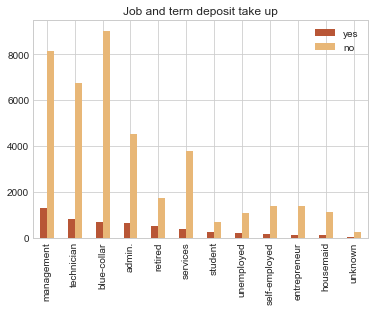

In [13]:
# job and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['job'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['job'].value_counts()

dfa.plot.bar(title = 'Job and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Marital status and term deposit take up'}>

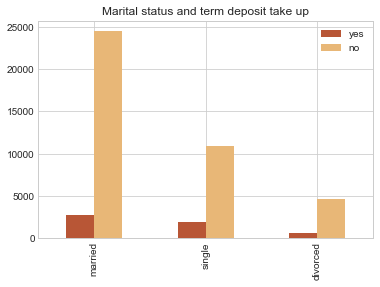

In [14]:
# marital status and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['marital'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['marital'].value_counts()

dfa.plot.bar(title = 'Marital status and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Education and term deposit take up'}>

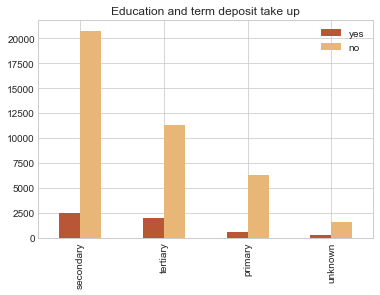

In [15]:
# education and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['education'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['education'].value_counts()

dfa.plot.bar(title = 'Education and term deposit take up', color = ('#b85636','#e8b777'))

# 

<AxesSubplot:title={'center':'Credit default and term deposit take up'}>

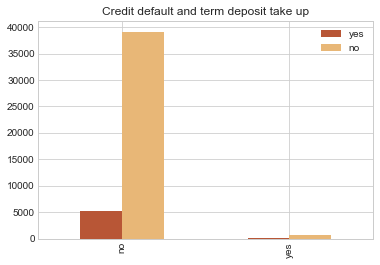

In [16]:
# credit default and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['default'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['default'].value_counts()

dfa.plot.bar(title = 'Credit default and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Housing and term deposit take up'}>

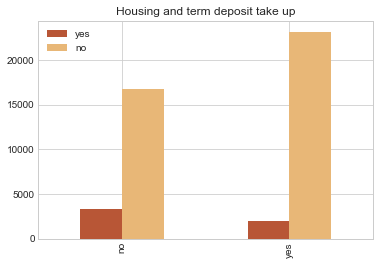

In [17]:
# housing loan and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['housing'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['housing'].value_counts()

dfa.plot.bar(title = 'Housing and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Personal loan and term deposit take up'}>

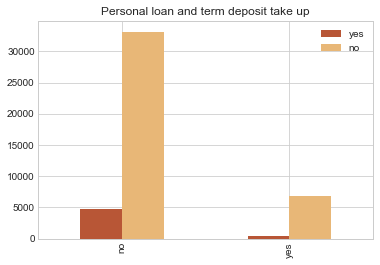

In [18]:
# personal loan and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['loan'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['loan'].value_counts()

dfa.plot.bar(title = 'Personal loan and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Communication type and term deposit take up'}>

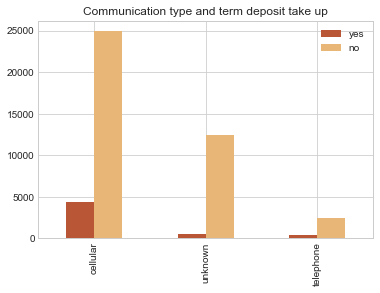

In [19]:
# contact and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['contact'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['contact'].value_counts()

dfa.plot.bar(title = 'Communication type and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Contact month and term deposit take up'}>

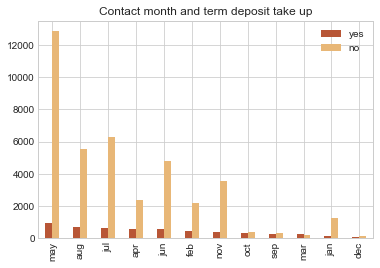

In [20]:
# month and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['month'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['month'].value_counts()

dfa.plot.bar(title = 'Contact month and term deposit take up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Previous campaign outcome and term deposit take up'}>

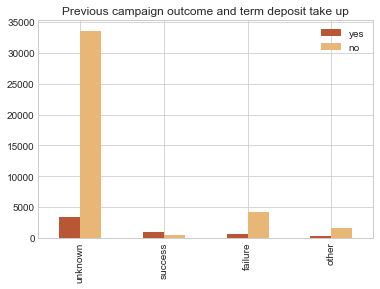

In [21]:
# poutcome and term deposit take up
dfa = pd.DataFrame()

dfa['yes'] = inp[inp['y'] == 'yes']['poutcome'].value_counts()
dfa['no'] = inp[inp['y'] == 'no']['poutcome'].value_counts()

dfa.plot.bar(title = 'Previous campaign outcome and term deposit take up', color = ('#b85636','#e8b777'))

Key findings:
* People in management highly likely to take up loan
* Married customers are less likely to take up term deposit
* Those with tertiary education are more likely to take up loan
* Those who don't don't have a credit default are more likely to take up term deposit. But not many people with credit default were contacted. Remove them from future campaigns
* Those who don't have a house loan are more likely to take up term deposit
* Those who don't have a personal loan are more likely to take up term deposit
* Communication type cellular are more likely to take up term deposit
* Although the months of Mar, Sept, Oct and Dec had the least amount of leads, difference between yes/no is not significant as other months.
* Customers where there was a positive outcome in previous campaign are more likely to take up

##### Step 2e: Let's compare term deposit (column y) and compare its values to numerical columns numerical columns

In [22]:
# balance and deposit
dfb = pd.DataFrame()
dfb['balance_yes'] = (inp[inp['y'] == 'yes'][['y','balance']].describe())['balance']
dfb['balance_no'] = (inp[inp['y'] == 'no'][['y','balance']].describe())['balance']

dfb

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

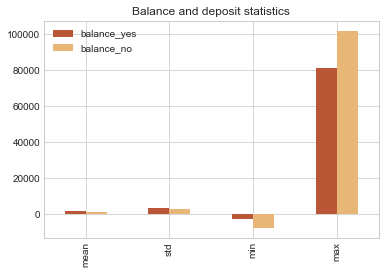

In [23]:
dfb.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics', 
        color = ('#b85636','#e8b777'))

In [24]:
# age and deposit

dfc = pd.DataFrame()
dfc['age_yes'] = (inp[inp['y'] == 'yes'][['y','age']].describe())['age']
dfc['age_no'] = (inp[inp['y'] == 'no'][['y','age']].describe())['age']

dfc

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

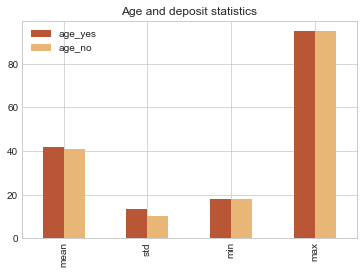

In [25]:
dfc.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics', 
        color = ('#b85636','#e8b777'))

In [26]:
# number of contacts performed during this campaign ('campaign') and deposit
dfd = pd.DataFrame()
dfd['campaign_yes'] = (inp[inp['y'] == 'yes'][['y','campaign']].describe())['campaign']
dfd['campaign_no'] = (inp[inp['y'] == 'no'][['y','campaign']].describe())['campaign']

dfd

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

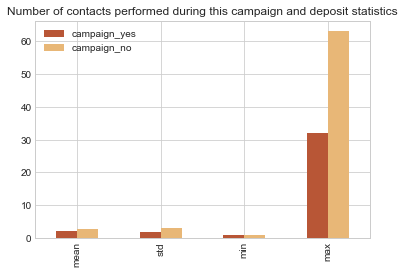

In [27]:
dfd.drop(['count', '25%', '50%', '75%']).plot.bar(
        title = 'Number of contacts performed during this campaign and deposit statistics', 
        color = ('#b85636','#e8b777'))

In [28]:
#number of contacts performed during previous campaign ('previous') and deposit
dfe = pd.DataFrame()
dfe['previous_yes'] = (inp[inp['y'] == 'yes'][['y','previous']].describe())['previous']
dfe['previous_no'] = (inp[inp['y'] == 'no'][['y','previous']].describe())['previous']

dfe

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

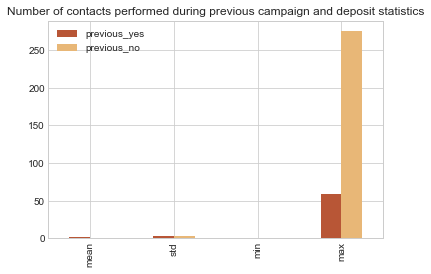

In [29]:
dfe.drop(['count', '25%', '50%', '75%']).plot.bar(
        title = 'Number of contacts performed during previous campaign and deposit statistics', 
        color = ('#b85636','#e8b777'))

Looking at the diagrams above we can conclude that:
* People who subscribed for term deposit tend to have greater balance and age values.
* People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

### Step 3: Data Cleaning

1. Convert columns with 'yes' and 'no' values to boolean columns;
2. Convert categorical columns into dummy variables.

In [30]:
#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [31]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = inp.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'y']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = inp.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [32]:
# clean the dataset
cleaned_df = clean_data(inp)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,y_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,58,2143,5,261,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,44,29,5,151,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,33,2,5,76,0,1,1,0,0,1,...,0,1,0,0,0,0,0,1,1.0,0.0
3,47,1506,5,92,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,33,1,5,198,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0


### Step 4: ML Classification Model (XGBoost)

Use cleaned datasets for prediction of campaign outcome with help of machine learning classification models. I will use XGBoost, which is one of the most common machine learning libraries for modelling.

Resulting model will also help me understand, which features have the greatest importance for the prediction of the results of the campaign.

In [33]:
# Create X and y datasets for training the model and split into train and test datasets.
X = cleaned_df.drop(columns = 'y_bool')
y = cleaned_df[['y_bool']]

In [34]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [36]:
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.937: test: 0.906


* XGB accuracy score for train: 0.937: test: 0.906

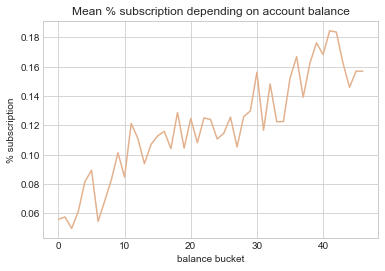

In [37]:
# Find out account balance, which marketing campaign should focus on:
df_new = cleaned_df.copy()

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['y_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values, color = '#e3b18d')
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [38]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1362

From the diagram above we can conclude, that marketing campaigns should concentrate on customers with account balance greater than $1362.

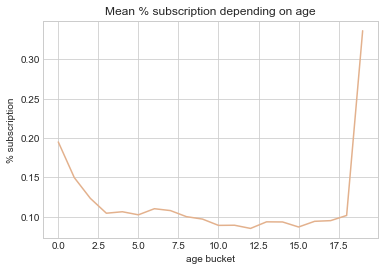

In [39]:
#introduce new column 'age_buckets' to  ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['y_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values, color = '#e3b18d')
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [40]:
df_new[df_new['age_buckets'] == 3]['age'].max()

32

In [41]:
df_new[df_new['age_buckets'] == 17]['age'].min()

54

Subscrpition rate tends to be higher for customers below 32 years old or above 54 years old.

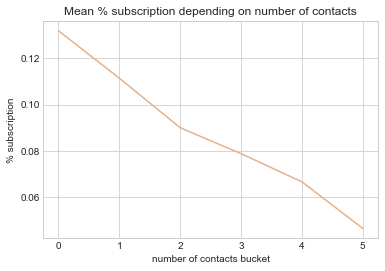

In [42]:
# Find out appropriate number of contacts with the customer during campaign:
#introduce new column 'age_buckets' to  ''
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['y_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values, color = '#e3b18d')
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [43]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

From the plot above we see that average take up rate is below 50% if the number of contacts during the campaign exceeds 4.

### Conclusion
Key outcomes of the analysis are the recommendations for future marketing campaigns:

* The customer's account balance has a huge influence on the campaign's outcome. People with account balance above $1362 are more likely to subscribe for term deposit, so future address those customers.
* The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 32 years old and above 54 years old.
* Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.